In [1]:
from helper.dataset_reader import read_tsv
from lang_id_crf import *
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [2]:
langid = LanguageIdentifier()

## Scenario 4:
1. Merge training and test data.
2. Exclude named entity. Replace NE into O


 Evaluation on the test data
Confusion Matrix
              precision    recall  f1-score   support

          ID       0.89      0.97      0.93     14891
          JV       0.86      0.85      0.85      4294
          EN       0.93      0.68      0.79      2076
           O       0.98      0.89      0.93      6809
   MIX-ID-EN       0.99      0.85      0.92       771
   MIX-ID-JV       0.98      0.82      0.89       256
   MIX-JV-EN       0.96      0.82      0.89       227

    accuracy                           0.91     29324
   macro avg       0.94      0.84      0.88     29324
weighted avg       0.91      0.91      0.91     29324



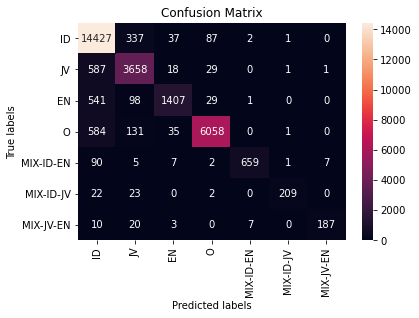


 Evaluation on the training data
Confusion Matrix
              precision    recall  f1-score   support

          ID       0.96      0.99      0.98     34238
          JV       0.94      0.94      0.94      9530
          EN       0.98      0.92      0.95      4547
           O       0.99      0.97      0.98     15793
   MIX-ID-EN       0.99      0.97      0.98      1914
   MIX-ID-JV       1.00      0.90      0.95       574
   MIX-JV-EN       0.97      0.92      0.95       556

    accuracy                           0.97     67152
   macro avg       0.98      0.94      0.96     67152
weighted avg       0.97      0.97      0.97     67152



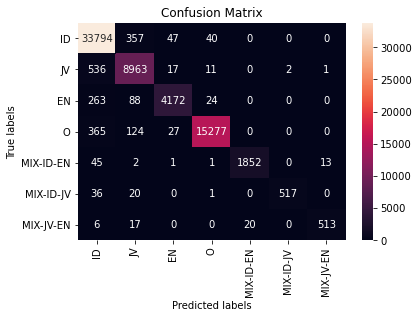


Top likely transitions:
O          -> O          3.71724
EN         -> O          2.78411
ID         -> O          2.76642
JV         -> O          2.48045
MIX-JV-EN  -> O          2.41530
MIX-ID-EN  -> O          2.15531
MIX-ID-JV  -> O          1.95162
EN         -> EN         1.23243
JV         -> JV         1.02413
ID         -> ID         0.49401
O          -> ID         0.45715
MIX-JV-EN  -> JV         0.42458
O          -> JV         0.36051
JV         -> MIX-JV-EN  0.31333
O          -> EN         0.29652
ID         -> MIX-ID-EN  0.24187
MIX-ID-JV  -> JV         0.17134
JV         -> MIX-ID-JV  0.00274
O          -> MIX-ID-JV  -0.11425
ID         -> EN         -0.13697

Top unlikely transitions:
EN         -> JV         -0.69310
O          -> MIX-JV-EN  -0.72926
JV         -> EN         -0.75754
MIX-ID-EN  -> EN         -0.77855
MIX-JV-EN  -> EN         -0.79675
MIX-ID-JV  -> ID         -0.86091
MIX-JV-EN  -> MIX-ID-JV  -0.89312
ID         -> JV         -1.23698
JV         -> 

In [3]:
dataset = read_tsv('../raw dataset/all-tagged-090422-merged-no-ne.tsv')
langid.train_test_result(data=dataset, test_size=0.3, n_label=7, model_name='mod_090422_no_ne.pkl')

In [4]:
import eli5
eli5.show_weights(langid.model, horizontal_layout=False)